In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

df=pd.read_csv('D:/1 A sreeja/Customer Churn.csv')
df.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is0 and no total charges are recorded

In [14]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.isnull().sum().sum()

0

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
df["customerID"].duplicated().sum()

0

#converted 0 and 1 values of senior citizen to yes/no to make it easier tom understand

In [32]:
def conv(value): 
    if value == 1:
        return "yes"
    else:
        return "no"  

In [33]:
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)    

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


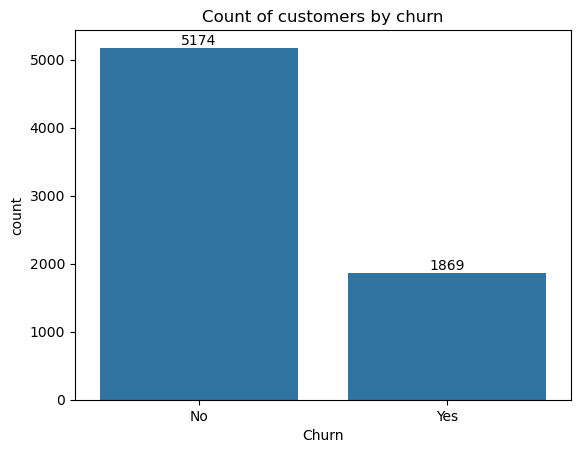

In [43]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")
plt.show()

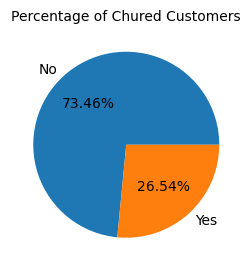

In [47]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Chured Customers", fontsize = 10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out. now lets explore the reason behind it.

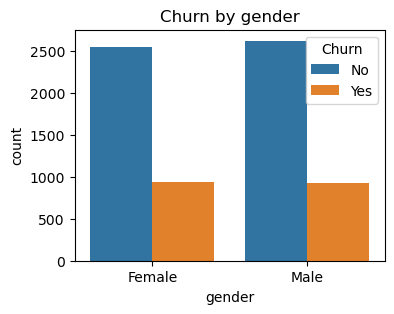

In [57]:
plt.figure(figsize = (4,3))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by gender")
plt.show()

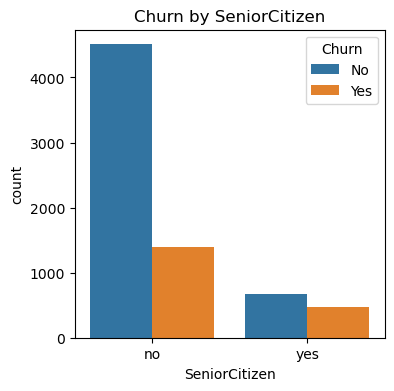

In [58]:
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

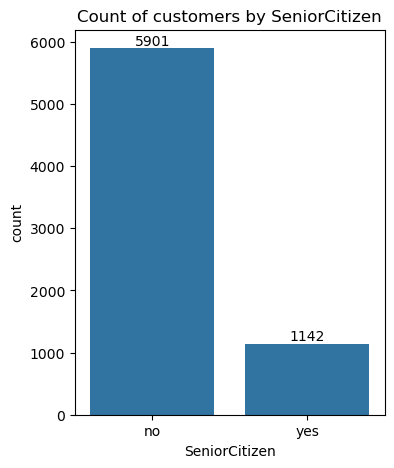

In [64]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by SeniorCitizen")
plt.show()

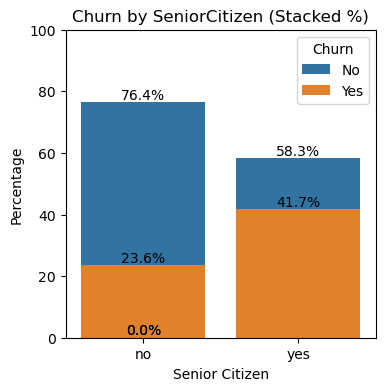

In [61]:
# Calculate percentage
df_percent = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).mul(100).rename("Percentage").reset_index()

# Plot
plt.figure(figsize=(4, 4))
ax = sns.barplot(x="SeniorCitizen", y="Percentage", hue="Churn", data=df_percent, dodge=False)

# Add labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Churn by SeniorCitizen (Stacked %)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.xticks(rotation=)
plt.ylim(0, 100)
plt.legend(title="Churn", loc='upper right') #Customize ledgend location
plt.show()

#Comparative a greated percentage of people in senior citizen category have churned out

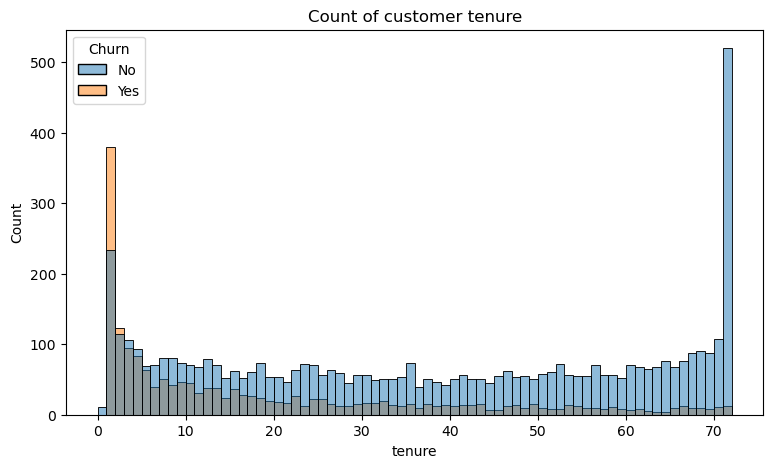

In [68]:
plt.figure(figsize = (9,5))
sns.histplot(x ='tenure', data = df, bins = 72, hue = 'Churn')
plt.title("Count of customer by tenure")
plt.show()

#people who have used our services for a long time have stayed and  people who have used our servics for 1 or 2 months have churned.

In [74]:
# Check unique values in the Contract column
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [75]:
# Mapping contract types to integers
contract_mapping = {"Month-to-month": 0, "One year": 1, "Two year": 2}
df["Contract"] = df["Contract"].map(contract_mapping).astype("int64")

# Verify the change
df["Contract"].dtype, df["Contract"].unique()

(dtype('int64'), array([0, 1, 2], dtype=int64))

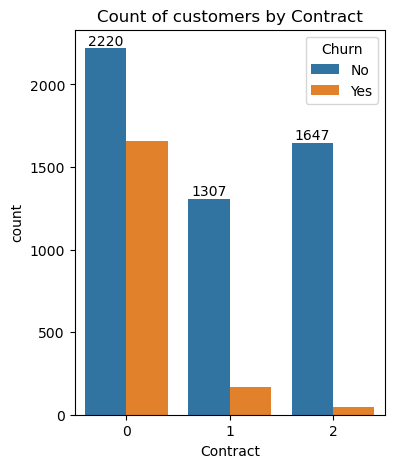

In [79]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Contract")
plt.show()

#people who have month to month contract are likely to churn than from those who have 1 or 2 years of contract

In [82]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

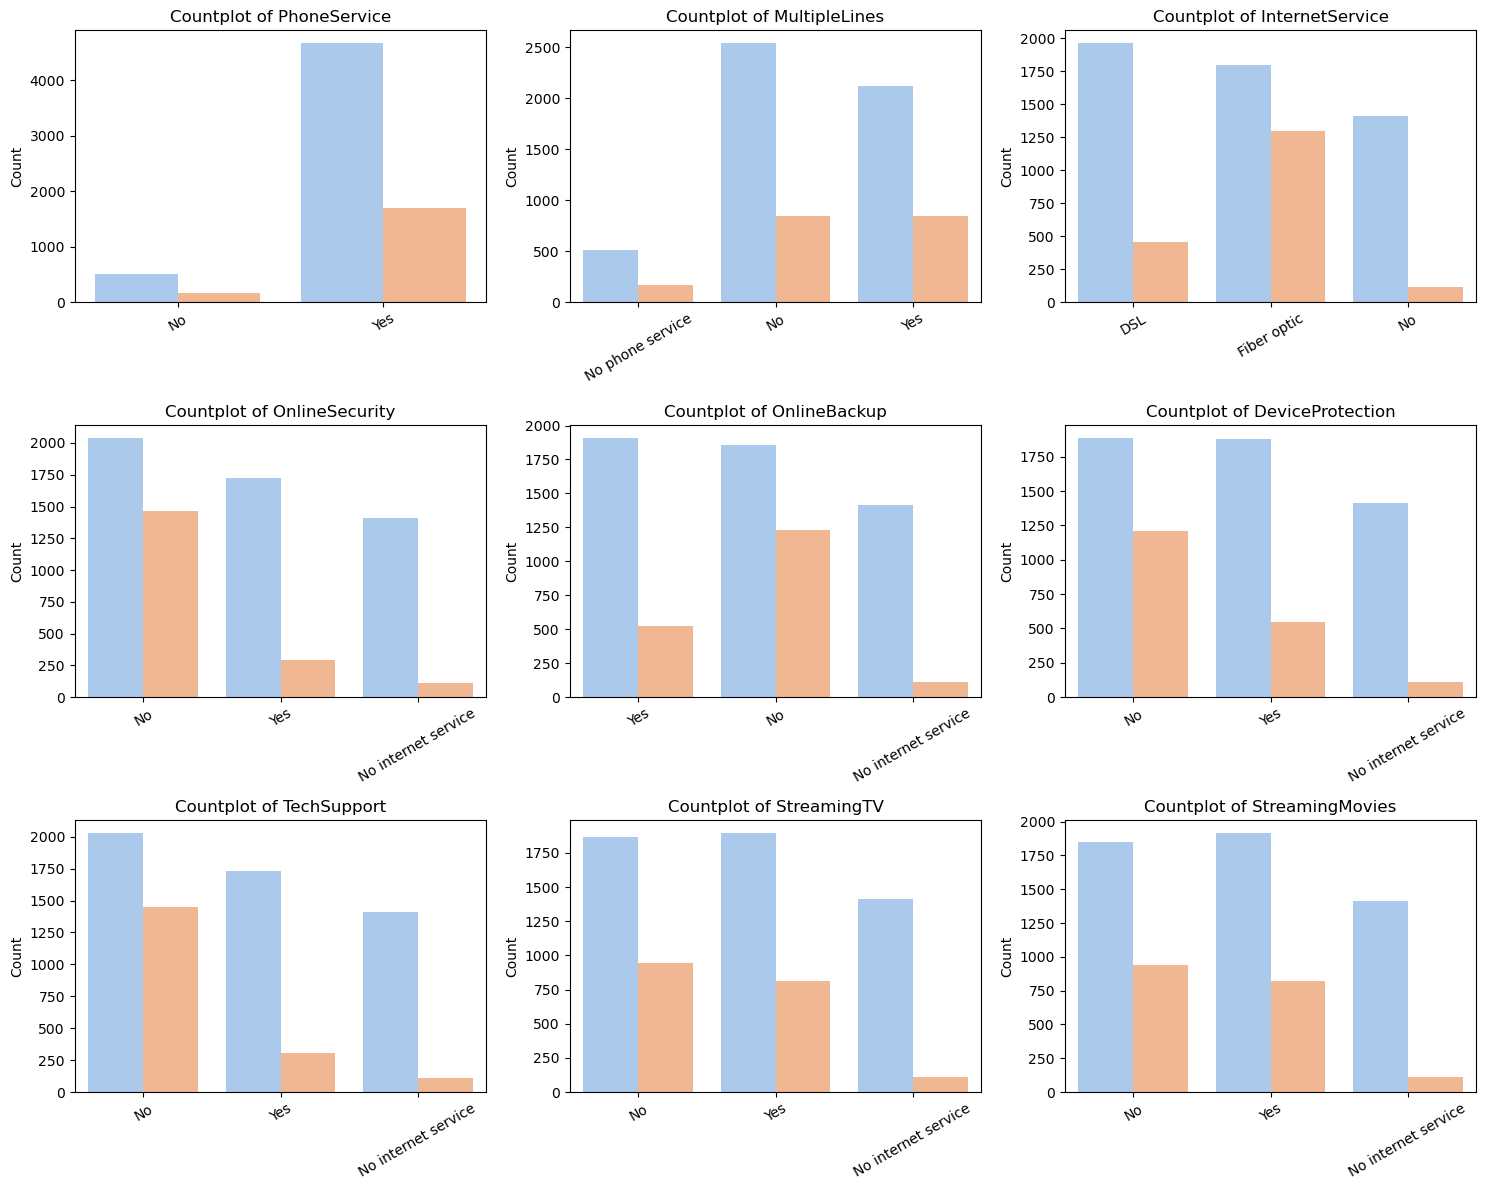

In [92]:
# Define columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set figure size
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each column and create a countplot
for i, col in enumerate(columns):
    sns.countplot(x=df[col], hue=df["Churn"], ax=axes[i], palette="pastel", legend=False)
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)

# Adjust layout
plt.tight_layout()
plt.show()


#The countplots illustrate the distribution of various telecom services among customers, segmented by churn (blue for non-churned, orange for churned). Services like OnlineSecurity,TechSupport, and StreamingTV/Movies have higher churn rates among non-subscribers, suggesting a potential link between these services and customer retention. Customers without internet or additional features tend to churn more, indicating a need for targetedupselling strategies.The data highlights key areas where service adoption could be improved to reduce churn. 

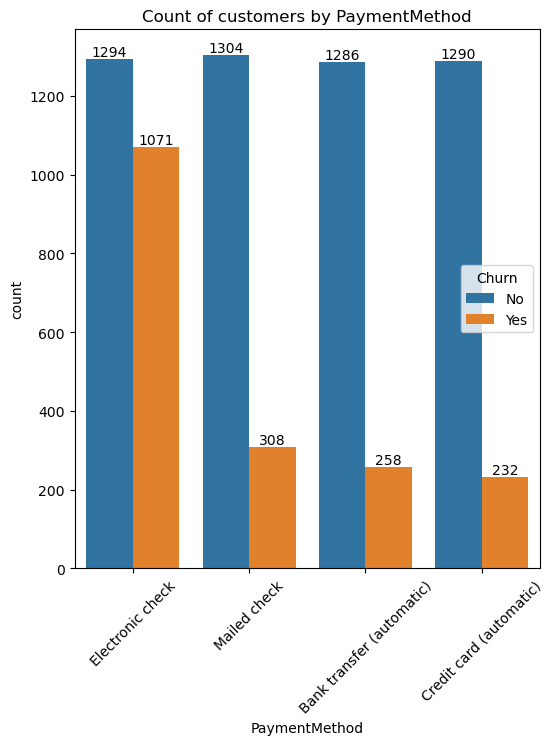

In [98]:
plt.figure(figsize = (6,7))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of customers by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method.